In [3]:
!pip install pandas numpy

In [44]:
!pip install matplotlib

     ---------------------------------------- 8.0/8.0 MB 31.8 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 53.6 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 23.3 MB/s eta 0:00:00
     ------------------------------------- 187.5/187.5 kB 11.1 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 6.2 MB/s eta 0:00:00


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors

In [33]:
#ls

In [2]:
df = pd.read_csv("C:/Users/mrber/datasets/train.csv")

In [3]:
df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
df.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion'], dtype='object')

In [5]:
df.columns = df.columns.str.replace(' ','_').str.lower()
#data consistency in column names by replacing spaces with underscore and converting all characters to lowercase

In [8]:
# Convert the 'date' column in the DataFrame 'df' to datetime format
# use the specific format %Y-%m-%d
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d")

In [11]:
min(df['date']), max(df['date'])

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-08-15 00:00:00'))

Inspecting the data

In [14]:
df.describe() #eda to gain insight to the distribution of the data

,id,date,store_nbr,sales,onpromotion
count,3.000888e+06,3000888,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2015-04-24 08:27:04.703088384,2.750000e+01,3.577757e+02,2.602770e+00
min,0.000000e+00,2013-01-01 00:00:00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,2014-02-26 18:00:00,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2015-04-24 12:00:00,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,2016-06-19 06:00:00,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,2017-08-15 00:00:00,5.400000e+01,1.247170e+05,7.410000e+02
std,8.662819e+05,NaN,1.558579e+01,1.101998e+03,1.221888e+01


In [13]:
df.loc[3]

id                               3
date           2013-01-01 00:00:00
store_nbr                        1
family                   BEVERAGES
sales                          0.0
onpromotion                      0
Name: 3, dtype: object

In [38]:
agg_df = df.groupby(['date','family']).agg({'sales':'sum'}).reset_index().sort_values(['family','date'])

In [39]:
agg_df.head()

,date,family,sales
0,2013-01-01,AUTOMOTIVE,0.0
33,2013-01-02,AUTOMOTIVE,255.0
66,2013-01-03,AUTOMOTIVE,161.0
99,2013-01-04,AUTOMOTIVE,169.0
132,2013-01-05,AUTOMOTIVE,342.0


In [17]:
df.value_counts()

id       date        store_nbr  family                   sales    onpromotion
0        2013-01-01  1          AUTOMOTIVE               0.000    0              1
2000584  2016-01-31  41         PERSONAL CARE            452.000  0              1
2000586  2016-01-31  41         PLAYERS AND ELECTRONICS  5.000    0              1
2000587  2016-01-31  41         POULTRY                  237.271  0              1
2000588  2016-01-31  41         PREPARED FOODS           105.349  0              1
                                                                                ..
1000298  2014-07-17  26         BEAUTY                   2.000    0              1
1000299  2014-07-17  26         BEVERAGES                667.000  2              1
1000300  2014-07-17  26         BOOKS                    0.000    0              1
1000301  2014-07-17  26         BREAD/BAKERY             166.641  2              1
3000887  2017-08-15  9          SEAFOOD                  16.000   0              1
Name: cou

In [19]:
df.shape

(3000888, 6)

In [25]:
#Subsetting using loc
#df_subset1 = df.loc[df['date']> '2015-04-24 12:00:00']

In [30]:
df_subset2 = df.query('date >= \'2015-04-24 12:00:00\'')

In [31]:
def missing_data(input_data):
    total = input_data.isnull().sum()
    percent = (input_data.isnull().sum()/input_data.isnull().count()*100)
    table = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
    types = []
    for col in input_data.columns: 
        dtype = str(input_data[col].dtype)
        types.append(dtype)
    table["Types"] = types
    return(pd.DataFrame(table))

In [32]:
missing_data(df_subset2)

,Total,Percent,Types
id,0,0.0,int64
date,0,0.0,datetime64[ns]
store_nbr,0,0.0,int64
family,0,0.0,object
sales,0,0.0,float64
onpromotion,0,0.0,int64


In [60]:
total_sales_df = agg_df.pivot(index='date',columns='family', values='sales')
total_sales_df.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0.0,0.0,2.0,810.0,0.0,180.58900,0.0,186.0,143.0,71.09000,...,0.0,110.801000,25.0,0.0,0.0,42.637000,37.847000,0.0,0.0,0.000000
2013-01-02,255.0,0.0,207.0,72092.0,0.0,26246.31900,0.0,74629.0,23381.0,15754.50000,...,0.0,20871.464028,17204.0,0.0,0.0,13975.884938,5338.111976,0.0,0.0,1526.750002
2013-01-03,161.0,0.0,125.0,52105.0,0.0,18456.48002,0.0,55893.0,18001.0,11172.45500,...,0.0,16597.398113,12568.0,0.0,0.0,10674.393983,3591.388005,0.0,0.0,1094.310994
2013-01-04,169.0,0.0,133.0,54167.0,0.0,16721.96901,0.0,52064.0,18148.0,10143.20900,...,0.0,21625.963055,11303.0,0.0,0.0,10772.515038,4472.965990,0.0,0.0,1293.120995
2013-01-05,342.0,0.0,191.0,77818.0,0.0,22367.76108,0.0,70128.0,23082.0,13734.94501,...,0.0,20879.091050,16819.0,0.0,0.0,13475.009055,5830.073020,0.0,0.0,1245.637004


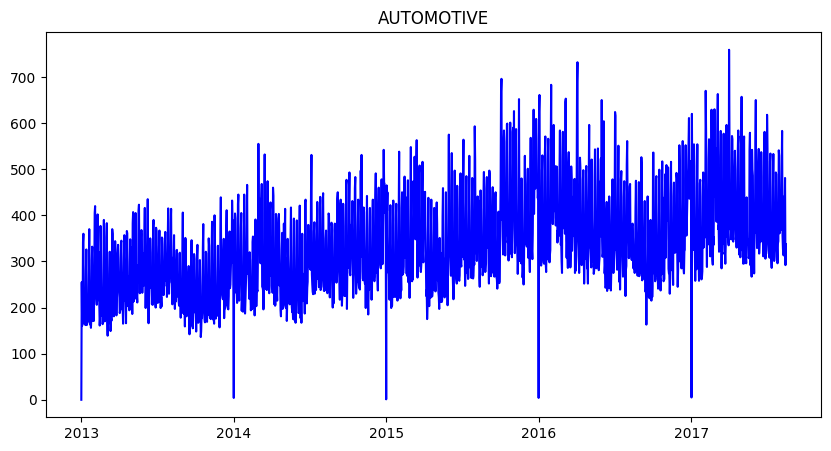

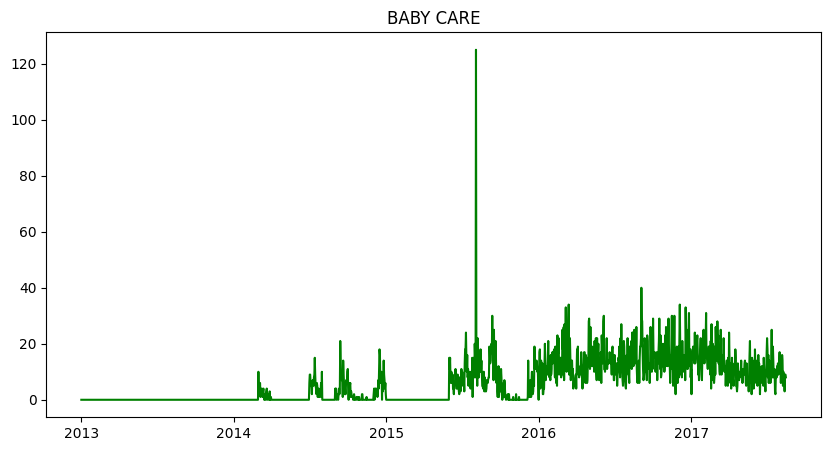

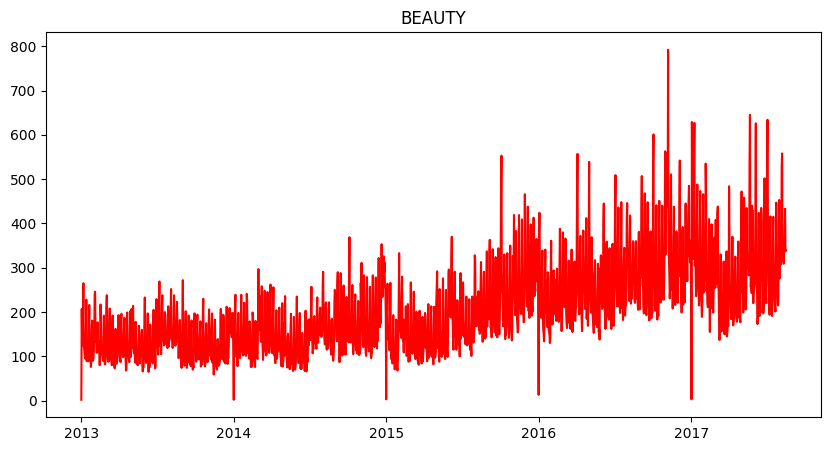

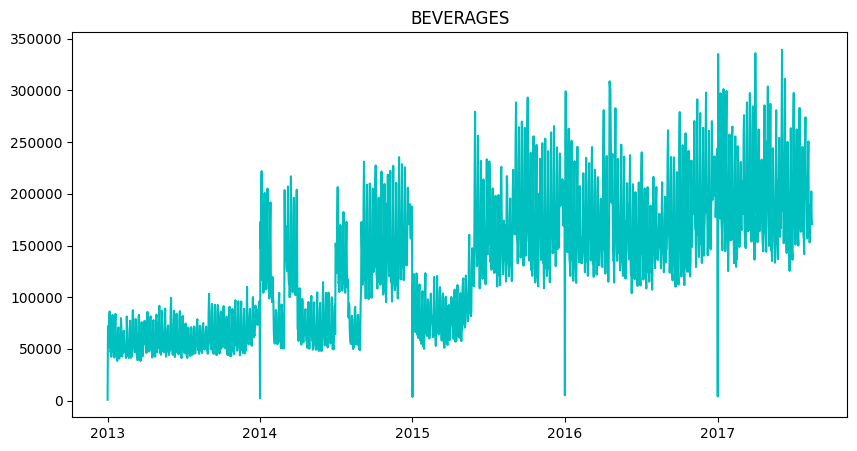

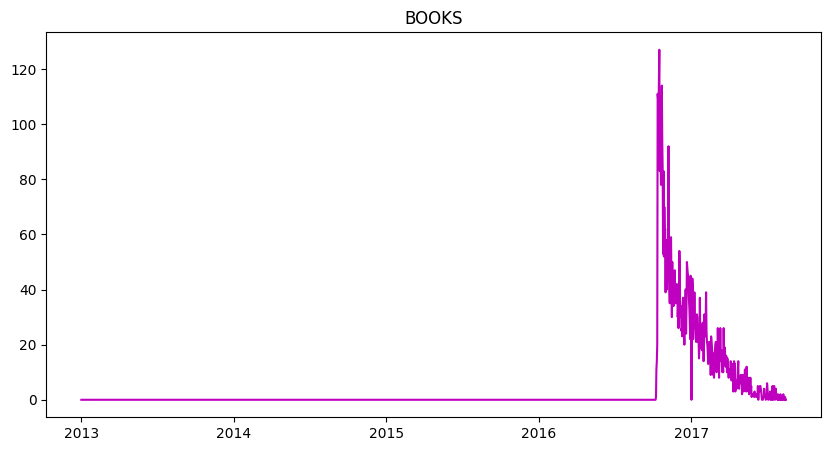

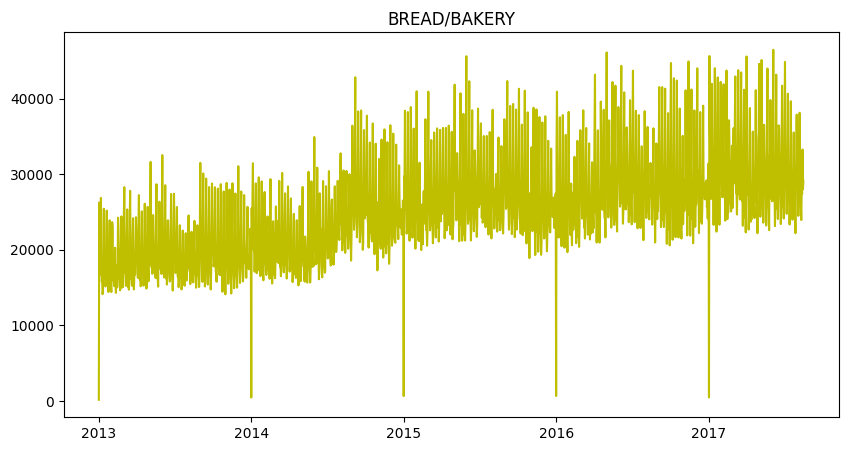

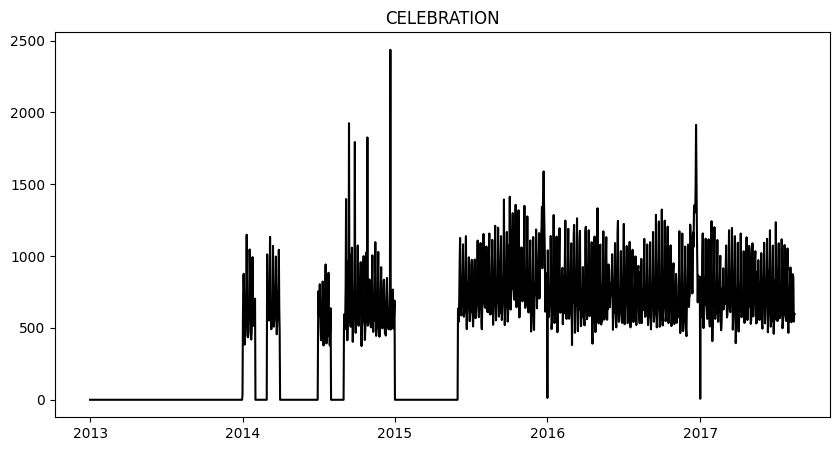

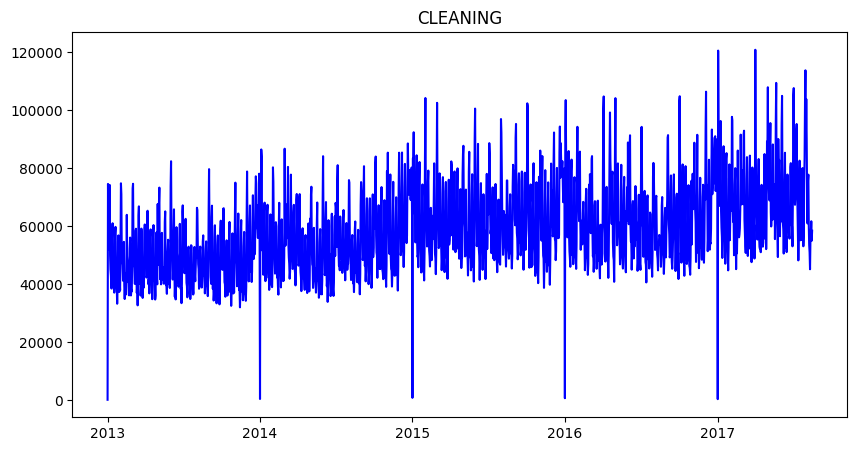

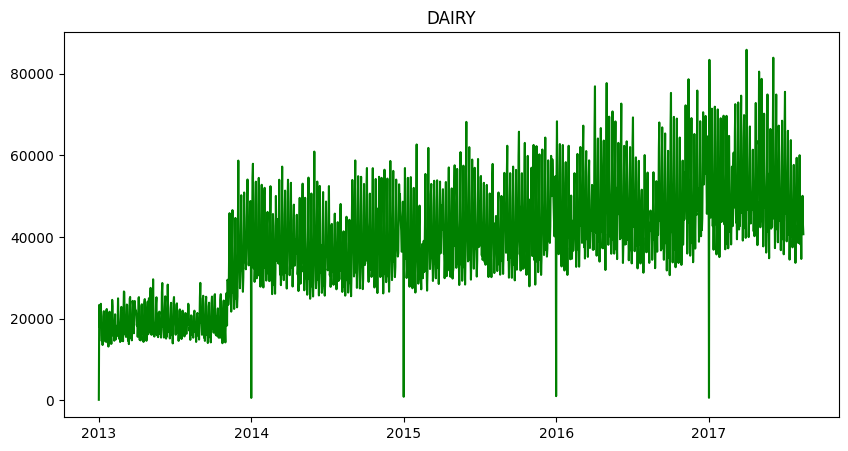

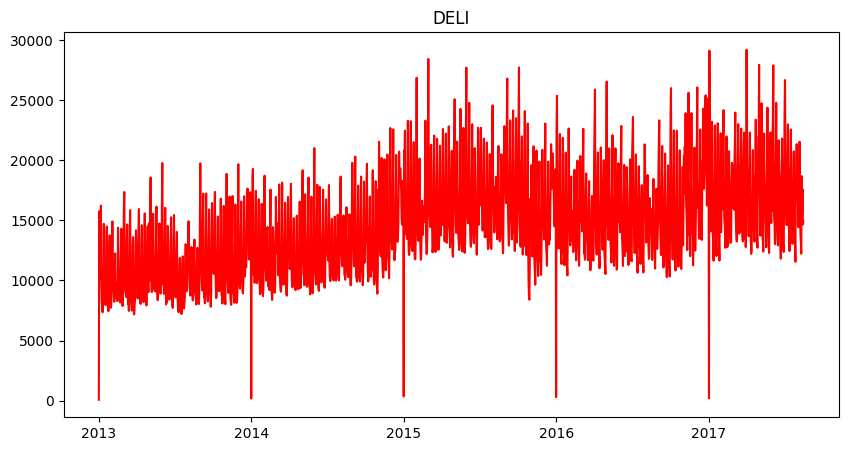

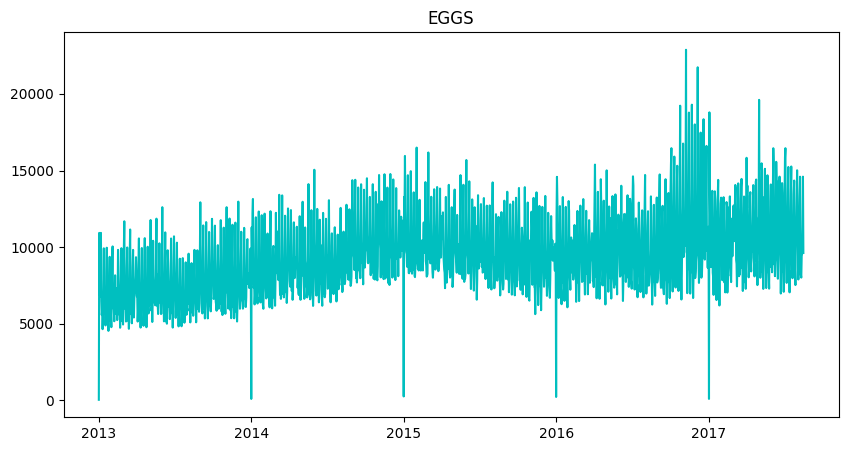

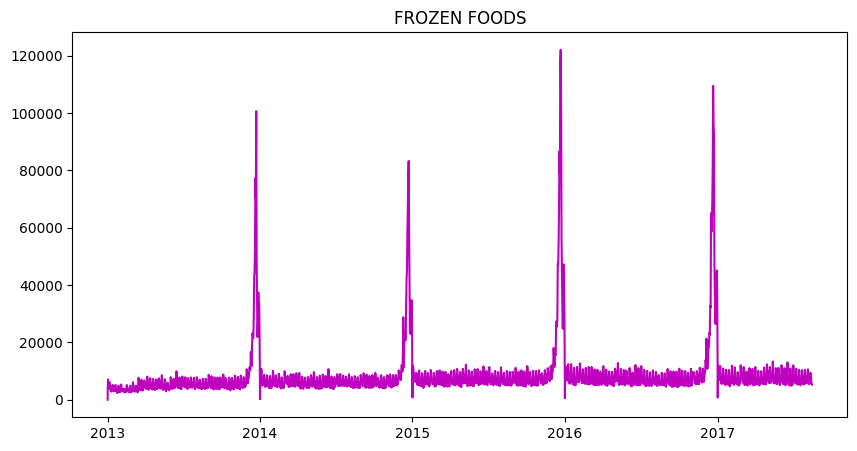

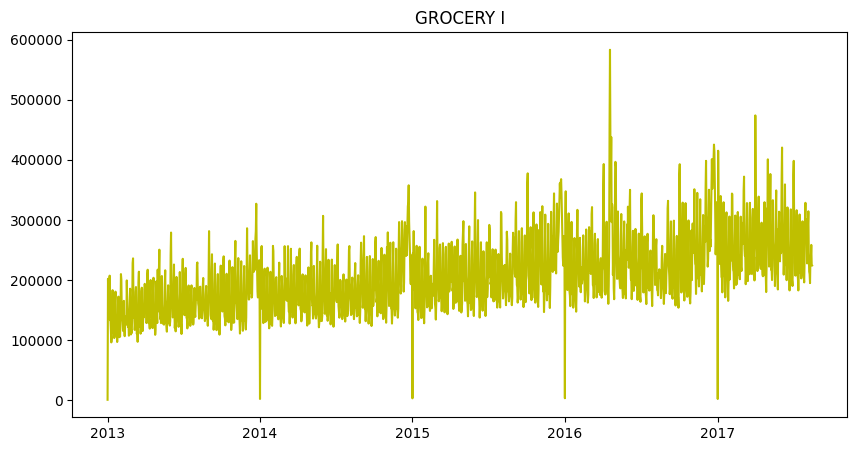

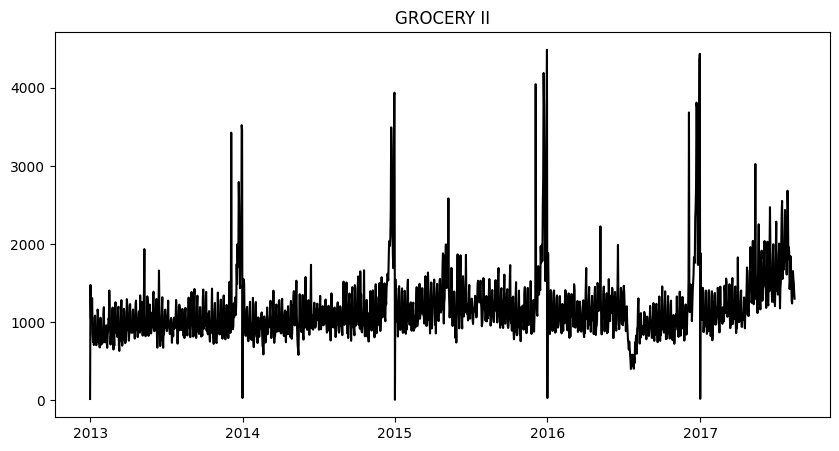

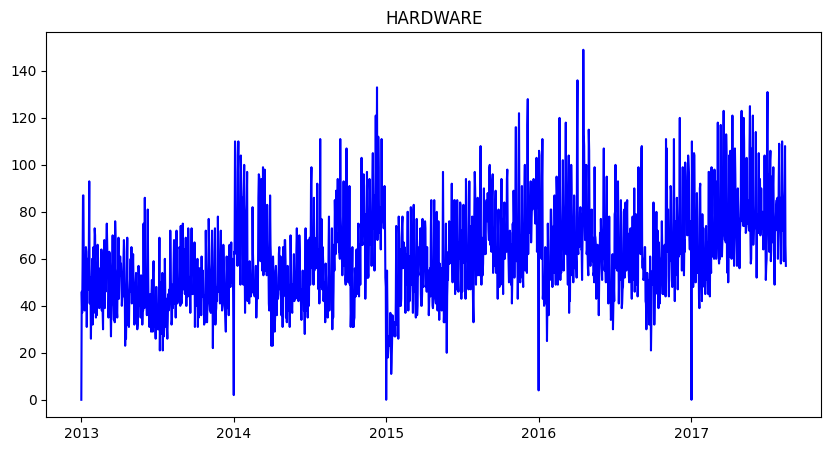

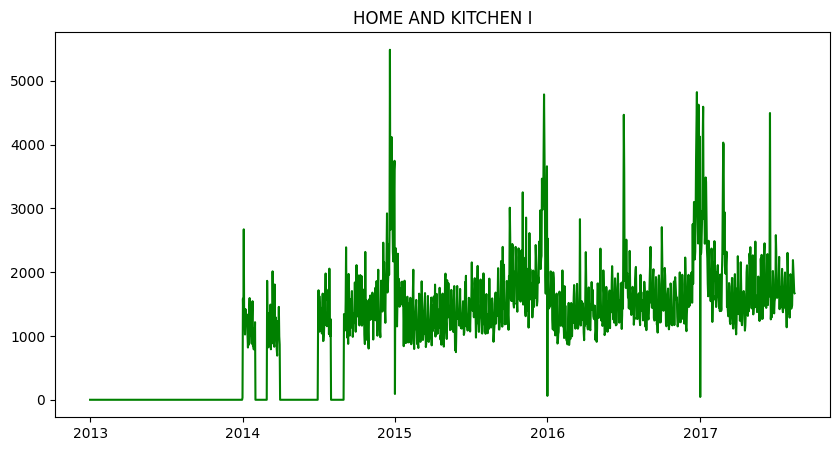

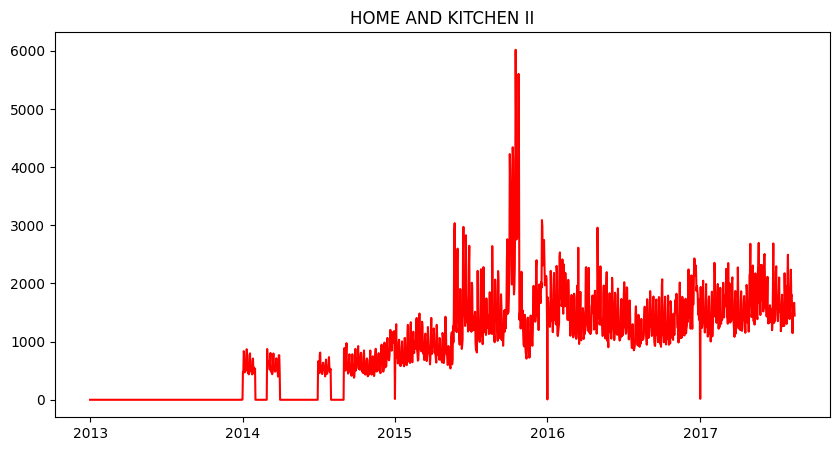

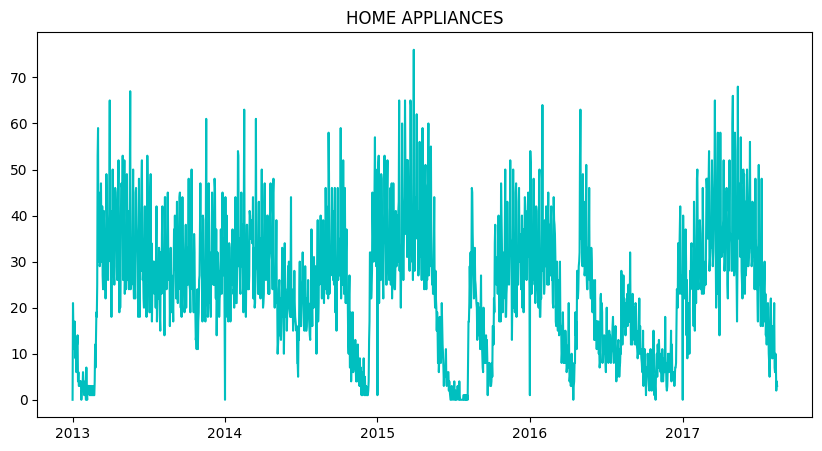

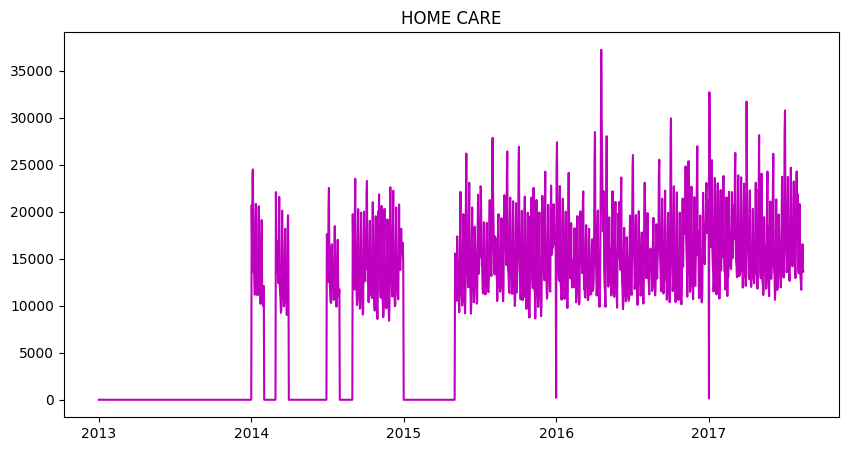

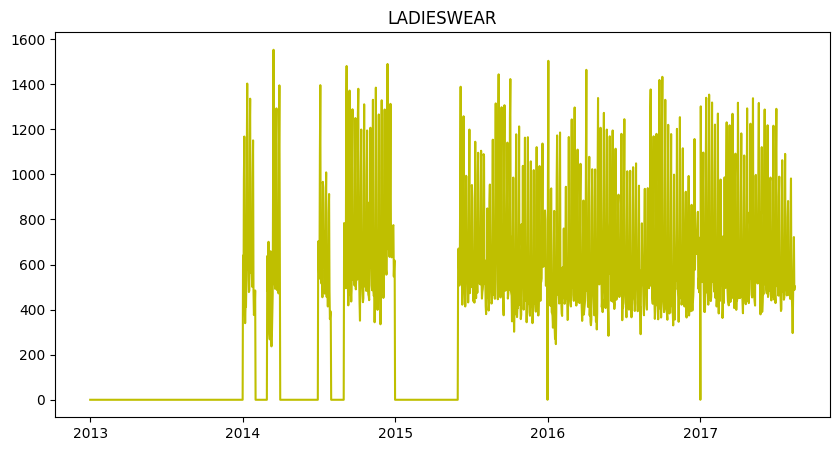

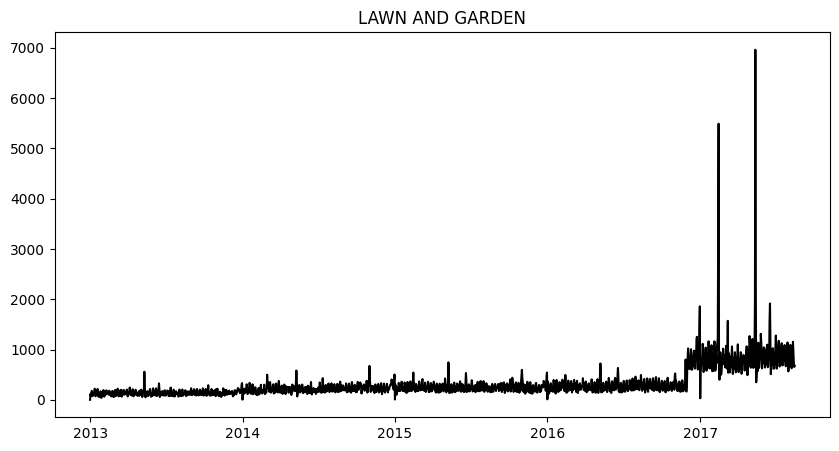

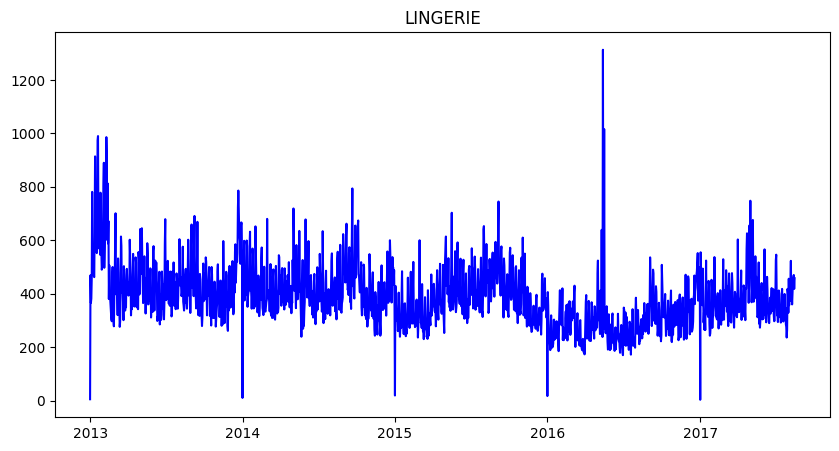

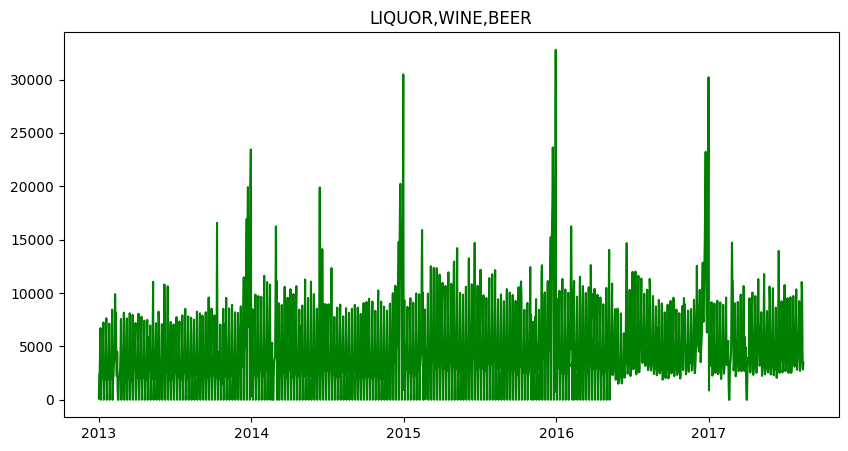

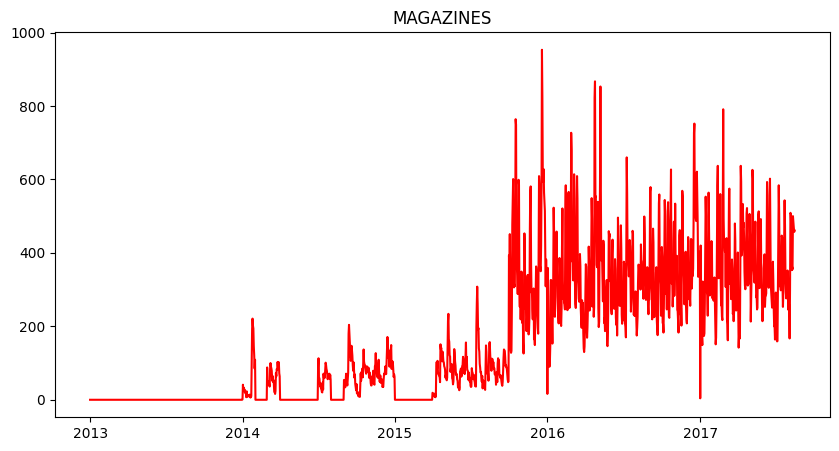

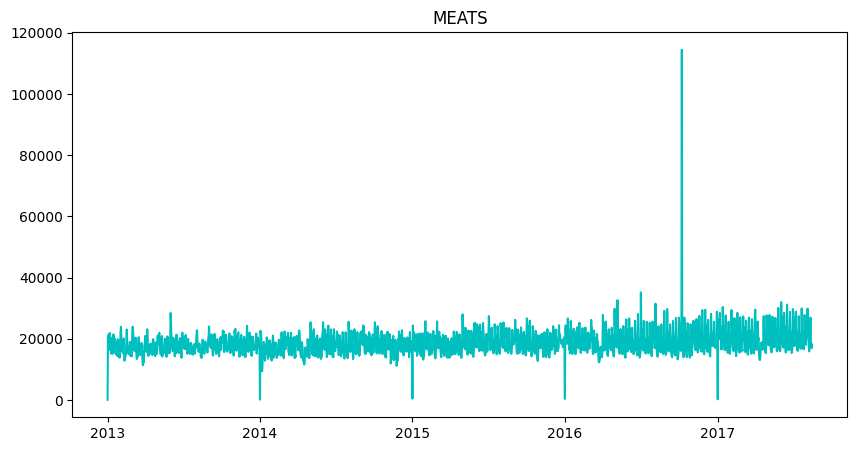

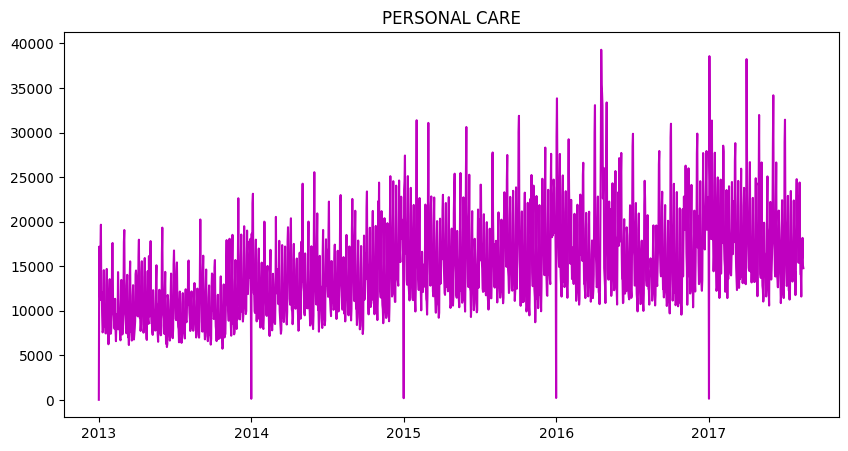

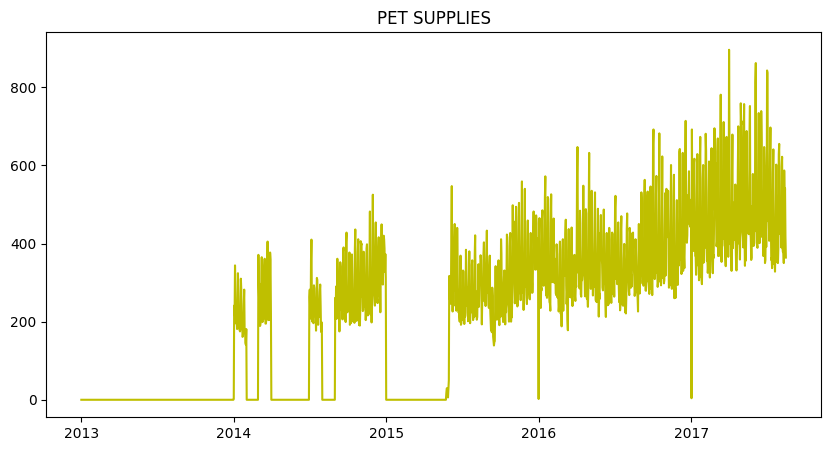

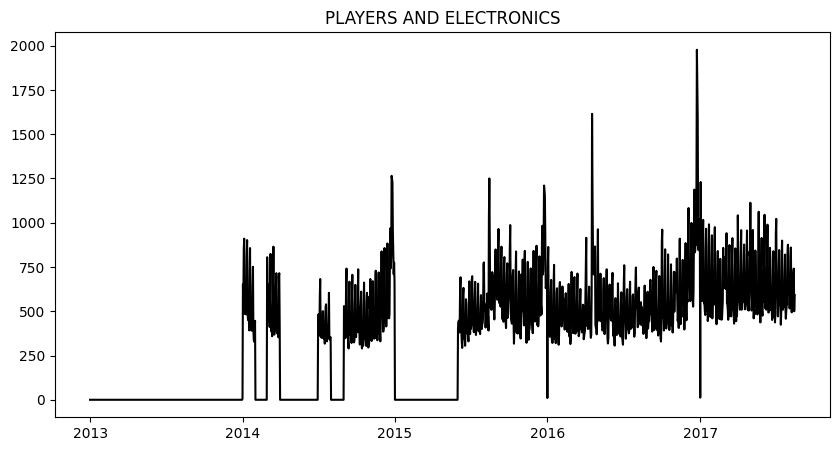

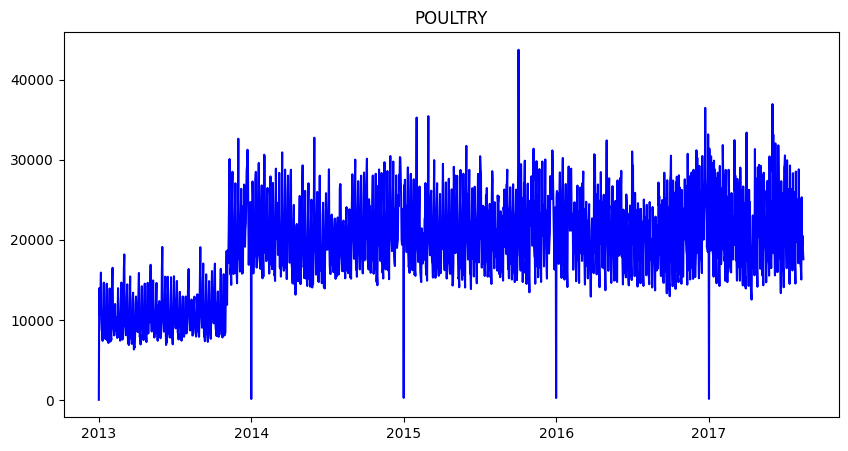

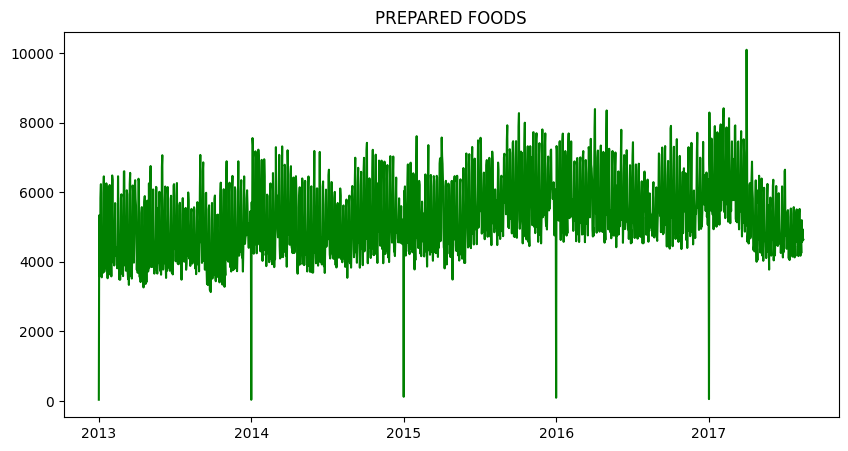

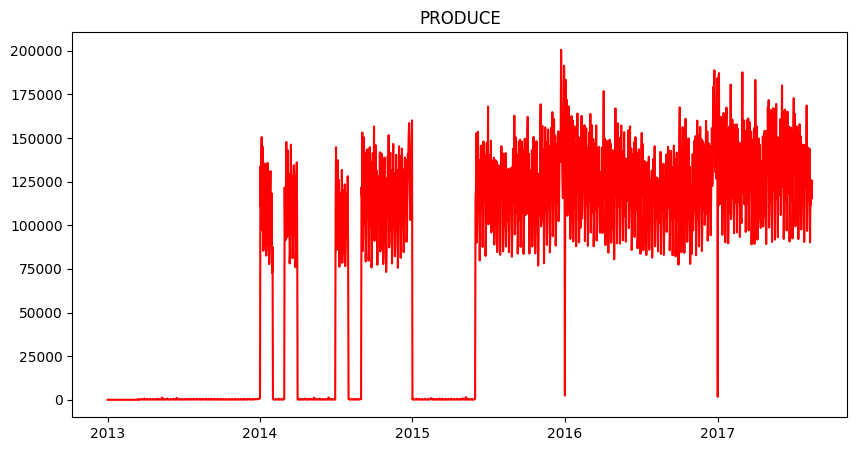

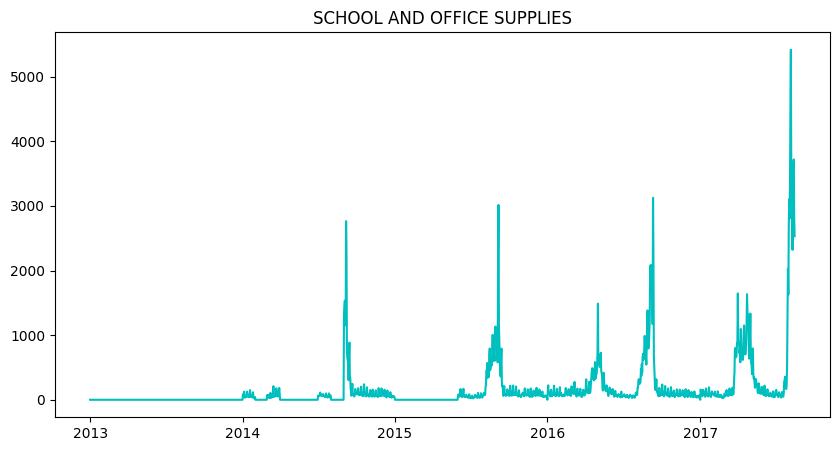

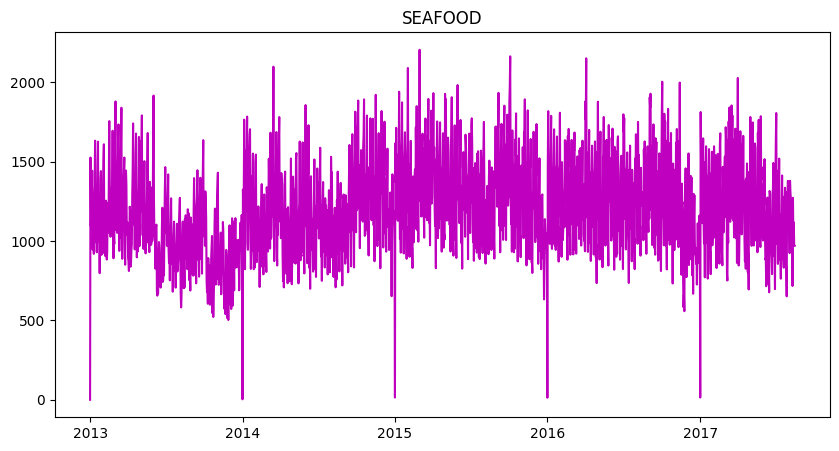

In [53]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Define a list of colors

for i, column in enumerate(total_sales_df.columns):
    plt.figure(figsize=(10,5))  # Set the figure size
    color = colors[i % len(colors)]  # Cycle through colors
    plt.plot(total_sales_df[column], color=color)  # Plot with color
    plt.title(column)  # Set the title
    plt.show()  # Show the plot


In [54]:
# for column in total_sales_df.columns:
#    plt.plot(total_sales_df[column])
#    plt.title(column)
#    plt.show()

It is important to do it individually because different categories 
Volume 
Audit 1 by 1, inventory issues, automotive , books has no data, forecasting models going to be different looking at different, frozen dozen - good for seasonal trend.

In [59]:
#total_sales_df = total_sales_df[total_sales_df.index>='2015-08-15'].copy()

In [57]:
total_sales_df.head()

family,AUTOMOTIVE,BABY CARE,BEAUTY,BEVERAGES,BOOKS,BREAD/BAKERY,CELEBRATION,CLEANING,DAIRY,DELI,...,MAGAZINES,MEATS,PERSONAL CARE,PET SUPPLIES,PLAYERS AND ELECTRONICS,POULTRY,PREPARED FOODS,PRODUCE,SCHOOL AND OFFICE SUPPLIES,SEAFOOD
date,,,,,,,,,,,,,,,,,,,,,
2015-08-15,454.0,18.0,251.0,217135.0,0.0,32509.90608,1157.0,75837.0,48578.0,19946.925,...,153.0,20403.940990,19398.0,370.0,1250.0,24718.795975,6854.544020,128147.17800,701.0,1507.242994
2015-08-16,413.0,11.0,313.0,208213.0,0.0,34851.87800,724.0,75824.0,50930.0,21178.461,...,157.0,20616.159980,21048.0,359.0,913.0,25480.778935,6640.393014,131493.92710,793.0,1448.716997
2015-08-17,289.0,14.0,175.0,149741.0,0.0,26361.76895,593.0,59718.0,38358.0,15755.025,...,125.0,16725.028985,14854.0,263.0,593.0,18549.113000,5212.498015,102769.59890,458.0,1166.222013
2015-08-18,295.0,10.0,166.0,132609.0,0.0,23915.94802,709.0,52749.0,33273.0,14119.251,...,102.0,15377.124025,13064.0,193.0,519.0,15722.331040,4758.126975,106468.22500,494.0,951.633993
2015-08-19,314.0,5.0,176.0,131368.0,0.0,23995.15200,599.0,51157.0,35760.0,13250.039,...,102.0,15654.345964,12581.0,257.0,535.0,16360.620083,5275.078985,132449.57997,545.0,996.733998


In [61]:
missing_data(total_sales_df)

,Total,Percent,Types
family,,,
AUTOMOTIVE,0,0.0,float64
BABY CARE,0,0.0,float64
BEAUTY,0,0.0,float64
BEVERAGES,0,0.0,float64
BOOKS,0,0.0,float64
BREAD/BAKERY,0,0.0,float64
CELEBRATION,0,0.0,float64
CLEANING,0,0.0,float64
DAIRY,0,0.0,float64


In [62]:
avg_daily_sales = total_sales_df.apply(np.mean, axis=0).sort_values()
low, mid = np.percentile(total_sales_df.apply(np.mean, axis=0).sort_values(),[33,66])

low_vol_columns = list(avg_daily_sales[avg_daily_sales<=low].index)
mid_vol_columns = avg_daily_sales[(avg_daily_sales>low) & (avg_daily_sales<mid)].index
high_vol_columns = avg_daily_sales[avg_daily_sales>=mid].index

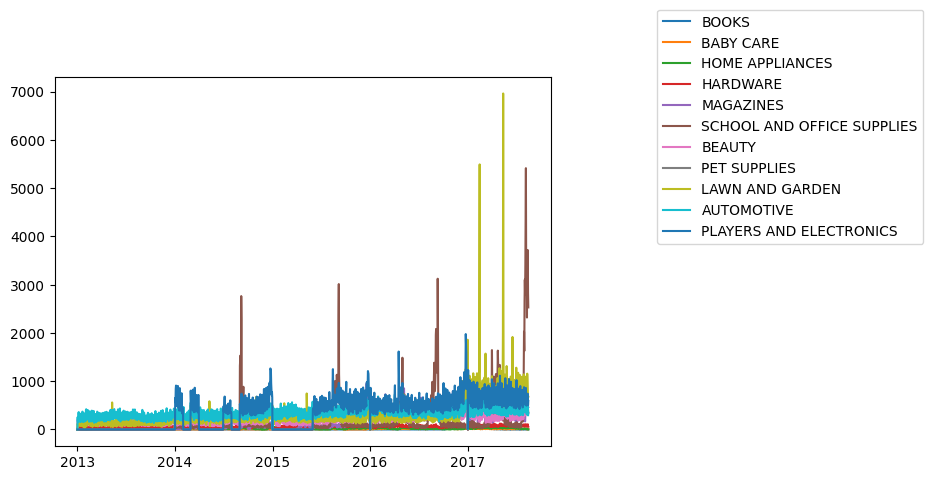

In [68]:
#total_sales_df[low_vol_columns].plot.line()
plt.plot(total_sales_df[low_vol_columns])
plt.legend(low_vol_columns, loc='best', bbox_to_anchor=(1.2, 1.2))
plt.show()

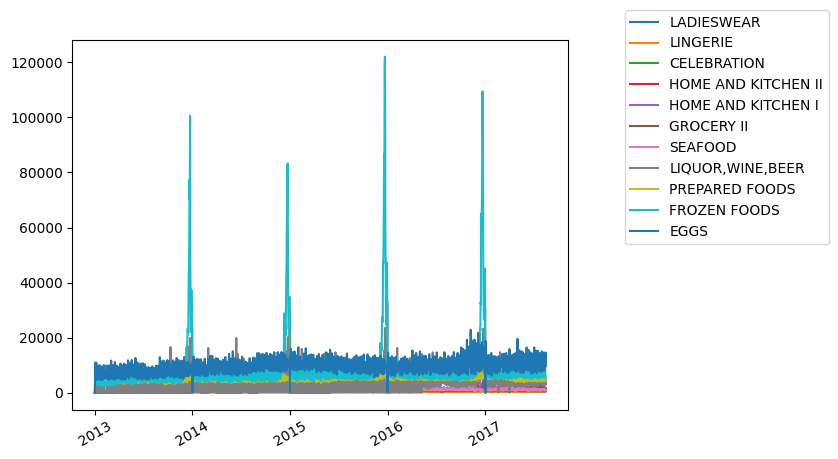

In [64]:
plt.plot(total_sales_df[mid_vol_columns])
plt.legend(mid_vol_columns, loc='best', bbox_to_anchor=(1.1, 1.1))
plt.xticks(rotation=30)
plt.show()

In [69]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100